In [1]:
# Importing library for data collection from kaggle
import kagglehub

# Importing libraries for data manipulation
import numpy as np
import pandas as pd

# Importing libararies for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing libaray to supress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libarary for neural networks
import tensorflow as tf

# Importing libarries for CNN
import cv2
import PIL

# Importing libarary for relearning
import tensorflow_hub as hub

# Importing libraries for BERT and Word2Vec
import gensim
import tensorflow_text as text

# Importing library for quantization
import tensorflow_model_optimization as tfmot

In [2]:
# Downloading the data directly kaggle for latest edition. 
path = kagglehub.dataset_download("arjuntejaswi/plant-village")
print("Path to dataset files:", path)

Resuming download from 47185920 bytes (297302129 bytes left)...
Resuming download from https://www.kaggle.com/api/v1/datasets/download/arjuntejaswi/plant-village?dataset_version_number=1 (47185920/344488049) bytes left.


100%|████████████████████████████████████████████████████████████████████████████████| 329M/329M [06:36<00:00, 749kB/s]

Extracting files...


Path to dataset files: C:\Users\DELL\.cache\kagglehub\datasets\arjuntejaswi\plant-village\versions\1


In [30]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS =3
EPOCHS=51

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size= BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [6]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
len(dataset)

68

In [8]:
68*32

2176

In [11]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 1 0 1 0 2 1 0 1 1 2 1 1 0 1 0 1 1 1 1 0 0 0 2 0 0 1 2 0 0 0 0]


In [12]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


In [13]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch)

tf.Tensor(
[[[[136. 133. 142.]
   [159. 156. 165.]
   [122. 119. 128.]
   ...
   [187. 184. 191.]
   [192. 189. 196.]
   [193. 190. 197.]]

  [[144. 141. 150.]
   [152. 149. 158.]
   [137. 134. 143.]
   ...
   [188. 185. 192.]
   [184. 181. 188.]
   [182. 179. 186.]]

  [[136. 133. 142.]
   [132. 129. 138.]
   [142. 139. 148.]
   ...
   [195. 192. 199.]
   [190. 187. 194.]
   [189. 186. 193.]]

  ...

  [[135. 133. 144.]
   [137. 135. 146.]
   [143. 141. 152.]
   ...
   [180. 178. 189.]
   [178. 176. 187.]
   [177. 175. 186.]]

  [[144. 142. 153.]
   [150. 148. 159.]
   [153. 151. 162.]
   ...
   [180. 178. 189.]
   [180. 178. 189.]
   [181. 179. 190.]]

  [[139. 137. 148.]
   [147. 145. 156.]
   [147. 145. 156.]
   ...
   [181. 179. 190.]
   [183. 181. 192.]
   [185. 183. 194.]]]


 [[[165. 154. 162.]
   [164. 153. 161.]
   [164. 153. 161.]
   ...
   [134. 121. 130.]
   [125. 112. 121.]
   [139. 126. 135.]]

  [[166. 155. 163.]
   [164. 153. 161.]
   [161. 150. 158.]
   ...
   [125. 1

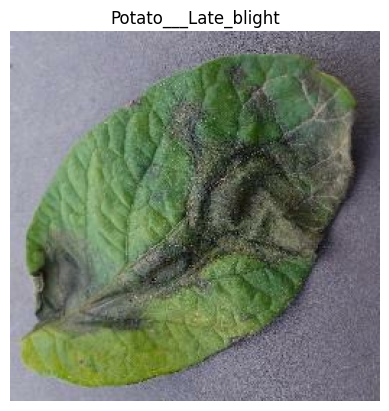

In [22]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis('off')

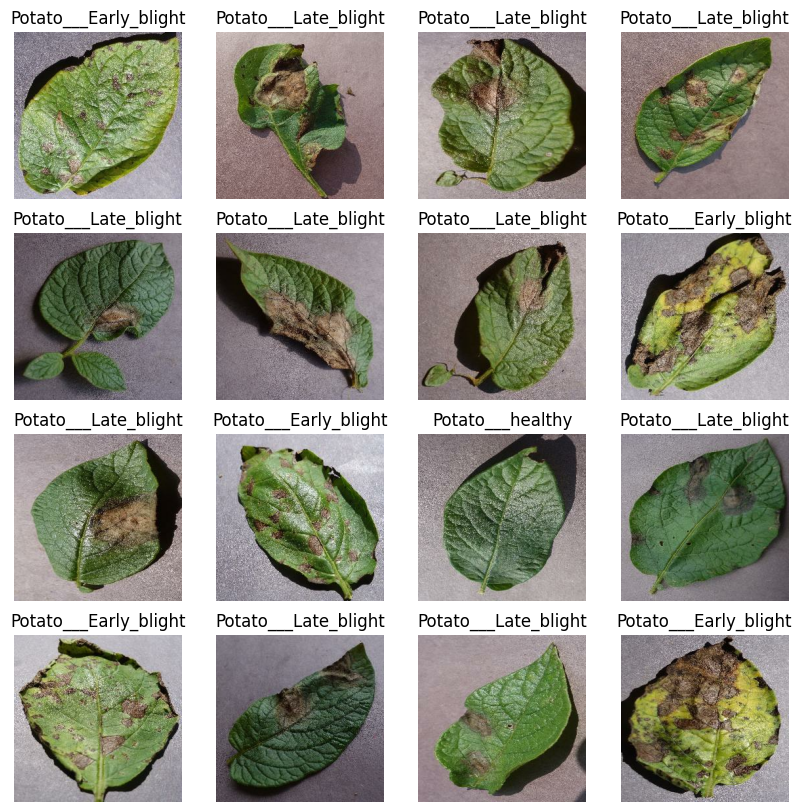

In [28]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(16):
        ax = plt.subplot(4,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [31]:
# Splitting the data now 80% training and 20% testing in this 10% is for validation
#80% TRAIN, 10% VALIDATION, 10% TESTING

In [32]:
# We don't have train_test_split in tensorflow

train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [33]:
train_datset = dataset.take(int(len(dataset)*train_size))
len(train_datset)

54

In [34]:
test_datset = dataset.skip(int(len(dataset)*train_size))    #skipping first 54 dataset as it has been taken by train
len(test_datset)

14

In [37]:
# our test_datset has got 20% data as of whole, need to give data to validation as well
validation_size = 0.1
validation_dataset = test_datset.take(int(len(dataset)*validation_size))    #as we know we are having 13.25 of remaing batch so I have taken 6
len(validation_dataset)

6

In [38]:
test_datset = test_datset.skip(int(len(dataset)*validation_size)) # as this data has been reserved for validation now
len(test_datset)               # new len is now 8 from 14

8

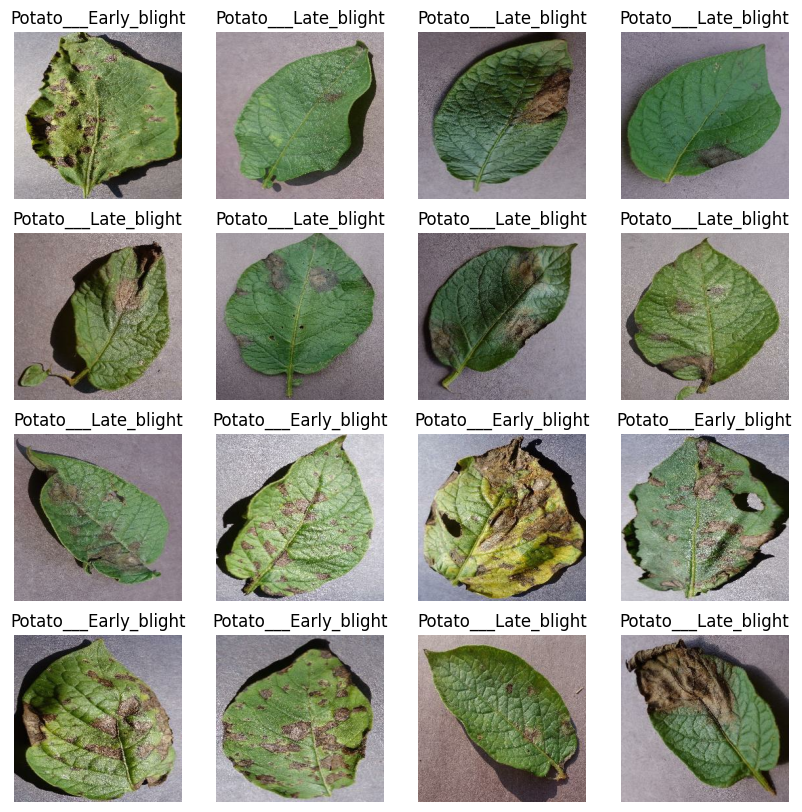

In [39]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(7):
    for i in range(16):
        ax = plt.subplot(4,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [59]:
def get_train_valid_test_split_datasets(dataset, shuffle=True, shuffle_size=10000):

    if shuffle:
        dataset = dataset.shuffle(shuffle_size, seed=7)
        
    train_size = 0.8
    validation_size = 0.1
    test_size = 0.1

    train_dataset = dataset.take(int(len(dataset)*train_size))
    validation_datset = dataset.skip(int(len(dataset)*train_size)).take(int(len(dataset)*validation_size))
    test_dataset = dataset.skip(len(train_dataset)+len(validation_dataset))

    return train_dataset,validation_dataset,test_dataset

In [60]:
train_dataset,validation_dataset,test_dataset = get_train_valid_test_split_datasets(dataset)
print(f"length of train_dataset : {len(train_dataset)}")
print(f"length of validation_dataset : {len(validation_dataset)}")
print(f"length of test_dataset : {len(test_dataset)}")

length of train_dataset : 54
length of validation_dataset : 6
length of test_dataset : 8


In [61]:
# it will read the next element from the memory but will have the inference about the previous one, thus improoving performance
train_datset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset = validation_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [63]:
# preprocessing -> scaling is required
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [64]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

In [65]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = len(class_names)

model = tf.keras.Sequential([
    resize_and_rescale,
    data_augmentation,

    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation='relu', input_shape = input_shape),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape=input_shape)

In [66]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [67]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [69]:
history = model.fit(train_dataset, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1, validation_data=validation_dataset)

Epoch 1/51
54/54 [==============================] - 114s 2s/step - loss: 0.8895 - accuracy: 0.4705 - val_loss: 0.7790 - val_accuracy: 0.5417
Epoch 2/51
54/54 [==============================] - 99s 2s/step - loss: 0.6249 - accuracy: 0.6984 - val_loss: 0.4833 - val_accuracy: 0.7865
Epoch 3/51
54/54 [==============================] - 97s 2s/step - loss: 0.4431 - accuracy: 0.8046 - val_loss: 0.4118 - val_accuracy: 0.8438
Epoch 4/51
54/54 [==============================] - 99s 2s/step - loss: 0.3556 - accuracy: 0.8480 - val_loss: 0.3903 - val_accuracy: 0.8333
Epoch 5/51
54/54 [==============================] - 99s 2s/step - loss: 0.2405 - accuracy: 0.9028 - val_loss: 0.6412 - val_accuracy: 0.8281
Epoch 6/51
54/54 [==============================] - 99s 2s/step - loss: 0.2243 - accuracy: 0.9074 - val_loss: 0.3169 - val_accuracy: 0.8594
Epoch 7/51
54/54 [==============================] - 98s 2s/step - loss: 0.2123 - accuracy: 0.9167 - val_loss: 0.2282 - val_accuracy: 0.9219
Epoch 8/51
54/54 [=

In [70]:
scores = model.evaluate(test_dataset)

8/8 [==============================] - 5s 517ms/step - loss: 0.0866 - accuracy: 0.9688


In [71]:
history.params

{'verbose': 1, 'epochs': 51, 'steps': 54}

In [72]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [73]:
history.history['loss']

[0.8894837498664856,
 0.6248791217803955,
 0.4431115686893463,
 0.3556365668773651,
 0.24046719074249268,
 0.22427618503570557,
 0.2123340219259262,
 0.2178671956062317,
 0.21102064847946167,
 0.19962434470653534,
 0.20995955169200897,
 0.13593469560146332,
 0.18587608635425568,
 0.13174161314964294,
 0.09735367447137833,
 0.1290605664253235,
 0.09776327759027481,
 0.05991905555129051,
 0.08147270977497101,
 0.09166479110717773,
 0.07412537187337875,
 0.06366481631994247,
 0.044651057571172714,
 0.056028109043836594,
 0.04451858252286911,
 0.043453820049762726,
 0.03265683352947235,
 0.0750904530286789,
 0.07206463068723679,
 0.02894524484872818,
 0.04056832566857338,
 0.04339207336306572,
 0.04437330737709999,
 0.020092224702239037,
 0.019940968602895737,
 0.01853177137672901,
 0.03250854089856148,
 0.02644171565771103,
 0.005890815518796444,
 0.006794973276555538,
 0.06662454456090927,
 0.011794849298894405,
 0.0262399073690176,
 0.08912522345781326,
 0.01874668337404728,
 0.01757354

In [74]:
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

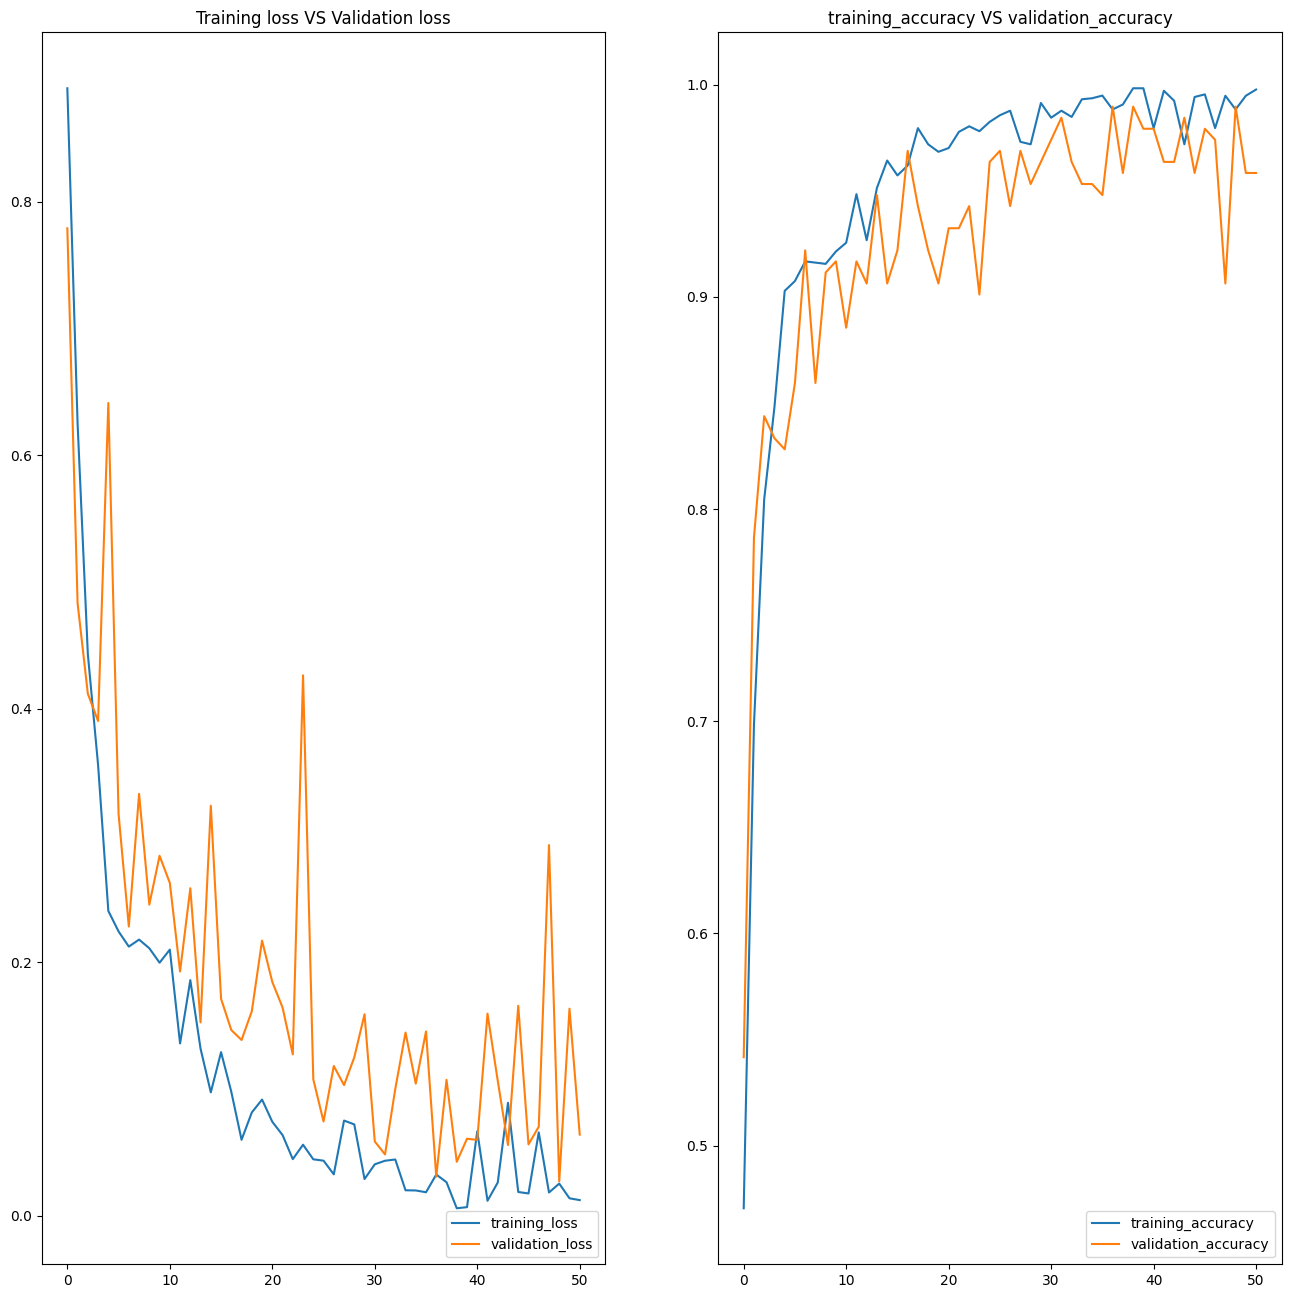

In [78]:
plt.figure(figsize=(16,16))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), training_loss, label="training_loss")
plt.plot(range(EPOCHS), validation_loss, label="validation_loss")
plt.title("Training loss VS Validation loss")
plt.legend(loc = "lower right")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), training_accuracy, label="training_accuracy")
plt.plot(range(EPOCHS), validation_accuracy, label="validation_accuracy")
plt.title("training_accuracy VS validation_accuracy")
plt.legend(loc = "lower right")

1/1 [==============================] - 1s 544ms/step


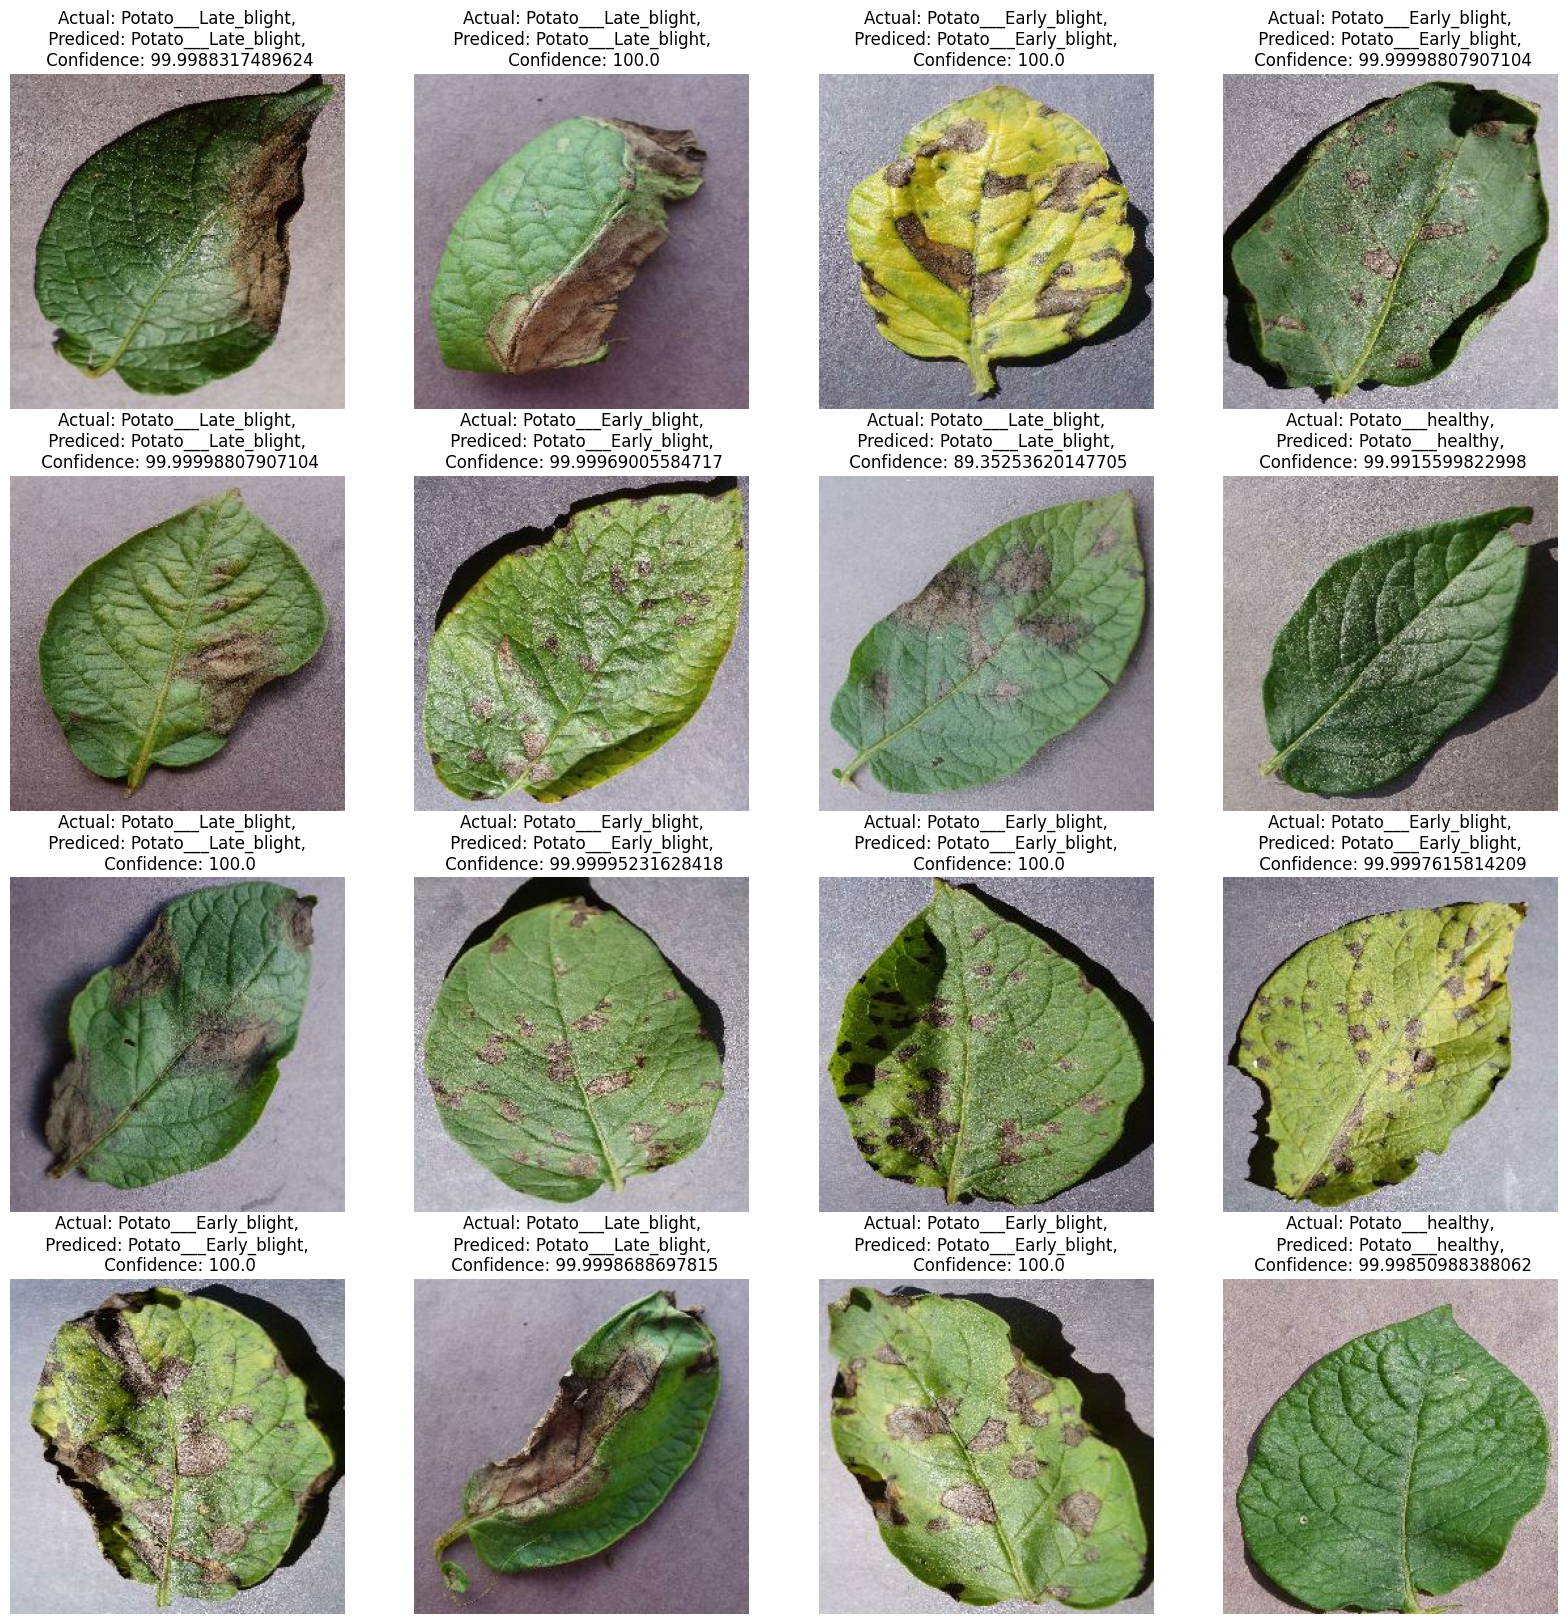

In [97]:
plt.figure(figsize=(20,20))
for images_batch, labels_batch in test_dataset.take(7):
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(images_batch[i].numpy().astype("uint8"))
        predicted_image = model.predict(images_batch)
        plt.title(f"Actual: {class_names[labels_batch[i]]},\n Prediced: {class_names[np.argmax(predicted_image[i])]}, \n Confidence: {np.max(predicted_image[i])*100}")
        plt.axis('off')

In [98]:
model_version=1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets


In [100]:
import os
os.listdir("../models/")

['1']

In [101]:
model_version=2
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2\assets


INFO:tensorflow:Assets written to: ../models/2\assets


In [102]:
import os
os.listdir("../models/")

['1', '2']

In [ ]:
# Next time what you can do is this.....
import os
model_version = int(max(os.listdir("../models/")))+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/3\assets
